# Import data and Preview

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


# Join two Data Frame

In [4]:
rating_movie = movies.set_index('movieId').join(ratings.set_index('movieId'))
rating_movie = rating_movie[['genres', 'rating']]
rating_movie.head()

,genres,rating
movieId,,
1,Adventure|Animation|Children|Comedy|Fantasy,3.0
1,Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Adventure|Animation|Children|Comedy|Fantasy,5.0
1,Adventure|Animation|Children|Comedy|Fantasy,2.0
1,Adventure|Animation|Children|Comedy|Fantasy,3.0


In [5]:
rating_movie.shape

(100063, 2)

In [6]:
# There are some missing rating value after joining two tables
rating_movie.isna().sum()

genres     0
rating    59
dtype: int64

In [7]:
rating_movie.dropna(inplace=True)

# Normalization the genres column

In [8]:
#Make a list to store genres and will be use as column
list_genres = []
for genres in movies['genres'].str.split(pat='|'):
    for genre in genres:
        if genre not in list_genres:
            list_genres.append(genre)

In [9]:
print ('Number of total genres: ', len(list_genres))

Number of total genres:  20


In [10]:
#Make it into a df and preview
df_genres = pd.DataFrame(columns=['totalRating', 'meanRating', 'count'], index=list_genres)
df_genres.fillna(0, inplace=True)
df_genres

,totalRating,meanRating,count
Adventure,0,0,0
Animation,0,0,0
Children,0,0,0
Comedy,0,0,0
Fantasy,0,0,0
Romance,0,0,0
Drama,0,0,0
Action,0,0,0
Crime,0,0,0
Thriller,0,0,0


In [11]:
# Split the items under genres columns for further using
rating_movie['genres'] = rating_movie['genres'].map(lambda x: x.split('|'))

In [12]:
rating_movie.head()

,genres,rating
movieId,,
1,"[Adventure, Animation, Children, Comedy, Fantasy]",3.0
1,"[Adventure, Animation, Children, Comedy, Fantasy]",4.0
1,"[Adventure, Animation, Children, Comedy, Fantasy]",5.0
1,"[Adventure, Animation, Children, Comedy, Fantasy]",2.0
1,"[Adventure, Animation, Children, Comedy, Fantasy]",3.0


In [13]:
range(len(rating_movie))

range(0, 100004)

In [14]:
rating_movie.reset_index(inplace=True)
rating_movie.head()

,movieId,genres,rating
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",3.0
1,1,"[Adventure, Animation, Children, Comedy, Fantasy]",4.0
2,1,"[Adventure, Animation, Children, Comedy, Fantasy]",5.0
3,1,"[Adventure, Animation, Children, Comedy, Fantasy]",2.0
4,1,"[Adventure, Animation, Children, Comedy, Fantasy]",3.0


In [15]:
# Fill in the df_genres table by checking every movie rating in rating_movie table
for idx, vote in enumerate(rating_movie['genres']):
    for genre in vote:
        for i in df_genres.index:
            if i==genre:
                df_genres.loc[i, 'count'] += 1
                df_genres.loc[i, 'totalRating'] += rating_movie.loc[idx, 'rating']

In [17]:
df_genres['meanRating'] = df_genres['totalRating'] / df_genres['count']

In [19]:
# Sort the data by mean rating column
df_final = df_genres.sort_values('meanRating', ascending=False)

In [20]:
df_final

,totalRating,meanRating,count
Film-Noir,4509.5,3.955702,1140
War,19181.5,3.817214,5025
Documentary,5964.0,3.813299,1564
(no genres listed),68.0,3.777778,18
Drama,164767.0,3.681780,44752
Crime,59853.0,3.679639,16266
Mystery,28056.5,3.679541,7625
Animation,22434.5,3.636062,6170
Musical,16993.5,3.598793,4722
IMAX,11270.5,3.571134,3156


# Visualization

In [22]:
# Drop no genres listed row
df_final.drop(index='(no genres listed)', inplace=True)

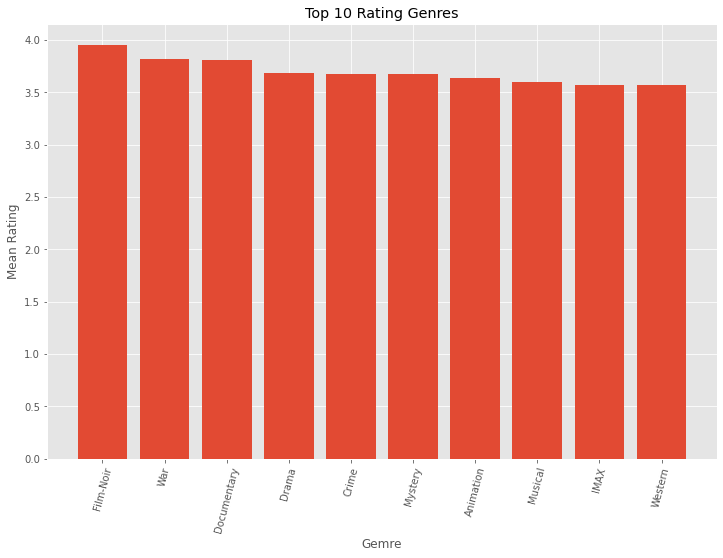

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.bar(x=df_final.index[:10], height=df_final['meanRating'][:10])
plt.title('Top 10 Rating Genres')
plt.xlabel('Gemre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=75)
plt.show()

The best genre in this case is Film-Noir with mean rating around 3.96.